![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, cohen_kappa_score
from imblearn.over_sampling import SMOTE

# Instructions

## Load the dataset and explore the variables.

In [2]:
customer_churn = pd.read_csv('./files_for_lab/customer_churn.csv')
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

### Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [3]:
# X/y split
X = customer_churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = customer_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_test_scaled_np = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
2683,-1.021824,-0.440389,0.491726
6712,-0.165308,-0.440389,0.685062
3569,-0.613959,-0.440389,-1.498307
1910,-1.103397,-0.440389,-1.146634
5350,0.854354,-0.440389,0.160054


### Build the logistic regression model.

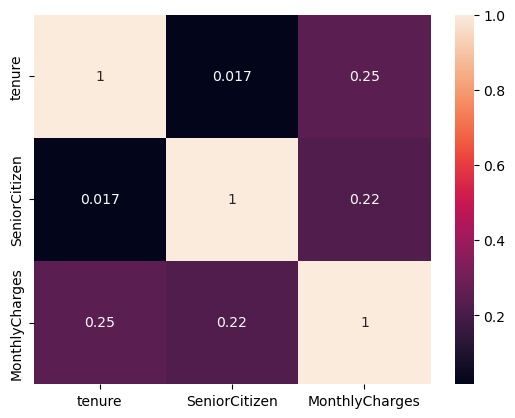

In [5]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# NO COLINEARITY

In [6]:
lr = LogisticRegression(random_state=24, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [7]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.55
Confusion Matrix:
[[545 775]
 [ 26 415]]
Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.41      0.58      1320
         Yes       0.35      0.94      0.51       441

    accuracy                           0.55      1761
   macro avg       0.65      0.68      0.54      1761
weighted avg       0.80      0.55      0.56      1761



### Evaluate the model.

In [8]:
lr = LogisticRegression(random_state=24, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.81


In [9]:
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, average='macro')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, average='macro')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, average='macro')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

# using average = macro for equal treatment in all variables

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.75
The recall in the TEST set is: 0.70
The F1 in the TEST set is: 0.71
The Kappa in the TEST set is: 0.43


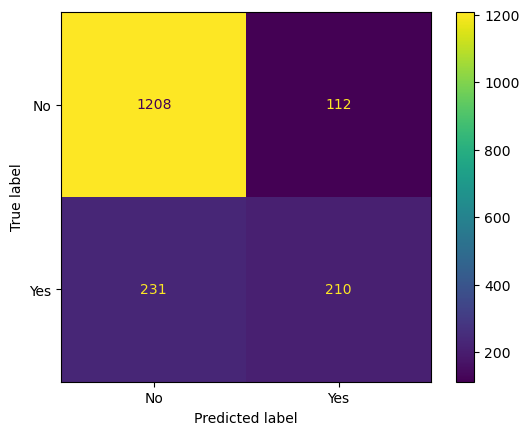

In [10]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

## Even a simple model will give us more than 70% accuracy. Why?

No     5174
Yes    1869
Name: Churn, dtype: int64


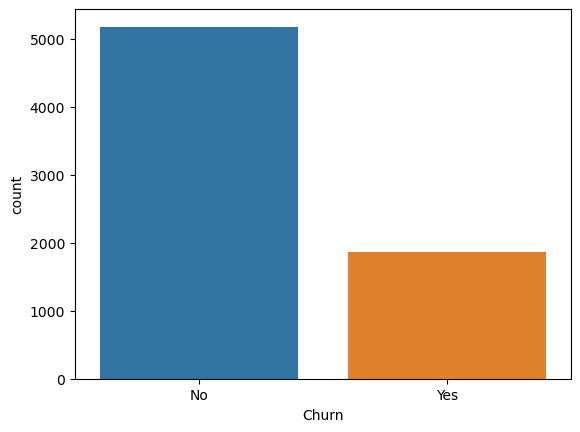

In [11]:
count_classes = customer_churn['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = customer_churn);
plt.show()

In [12]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [13]:
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [14]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7708, 3)


In [15]:
print(y_train_SMOTE.value_counts())

Yes    3854
No     3854
Name: Churn, dtype: int64


In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, average='macro')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, average='macro')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, average='macro')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

# using average = macro for equal treatment in all variables 

The accuracy in the TEST set is: 0.73
The precision in the TEST set is: 0.68
The recall in the TEST set is: 0.73
The F1 in the TEST set is: 0.69
The Kappa in the TEST set is: 0.40


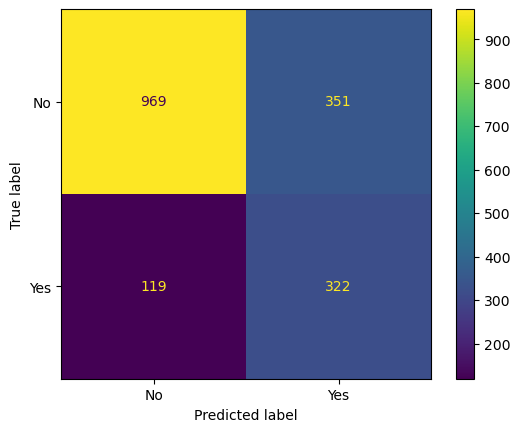

In [18]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()